In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
easiness = 6.125
easiness_err = 0.1068116574
compatibility = 5.875	
compatibility_err = 0.1876652711
satisfaction = 5.75
satisfaction_err = 0.2136233148
mental_loading = 6.625	
ml_err = 0.5837583486
physical_demand	 = 3
pd_err = 0.2788866755
temporal_demand = 9.25
td_err = 0.7753647375
performance	= 5.75
p_err = 0.5959519529
effort = 6.75
effort_err = 0.4249182928
frustration = 5.75
f_err = 0.568693853

In [57]:
df1 = pd.read_csv("../data/application_result.csv")

In [59]:
df1['Q1'][1:8].tolist()

[4, 5, 4, 4, 3, 4, 5]

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# create data
x = [('Q' + str(i)) for i in range(1, 11)]
data = []
for i in range(1, 11):
    data.append(df1['Q' + str(i)][0:8].tolist())
stacked_data = []
for i in range(10):
    q = []
    for j in range(1, 6):
        q.append(data[i].count(j))
    stacked_data.append(q)

# result_data = np.array(stacked_data).T.tolist()
stacked_data



# plt.show()

[[0, 0, 1, 5, 2],
 [3, 3, 2, 0, 0],
 [0, 0, 1, 4, 3],
 [4, 4, 0, 0, 0],
 [0, 1, 2, 4, 1],
 [3, 4, 1, 0, 0],
 [0, 0, 2, 6, 0],
 [3, 3, 2, 0, 0],
 [0, 2, 0, 5, 1],
 [2, 5, 0, 1, 0]]

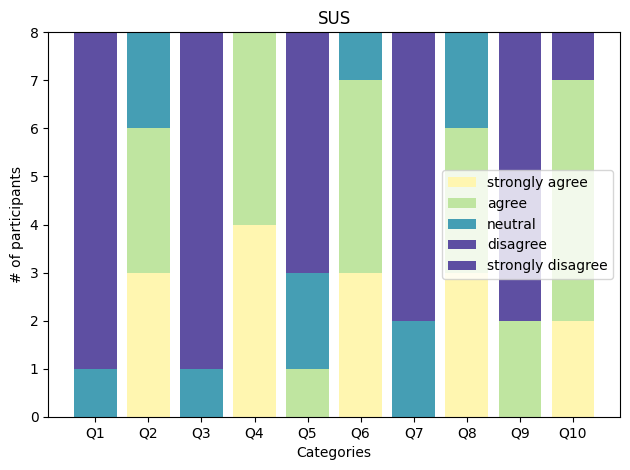

In [89]:
import seaborn as sns
# Column labels
columns = ['Q' + str(i) for i in range(1, 11)]

# Plot stacked bar chart
fig, ax = plt.subplots()
bottom = np.zeros(len(result_data[0]))

cmap = sns.color_palette("Spectral", as_cmap=True)
count = 120
for row in result_data:
    ax.bar(columns, row, bottom=bottom, color = cmap(count))
    bottom += row
    count += 50

ax.set_title('SUS')
ax.set_xlabel('Categories')
ax.set_ylabel('# of participants')
ax.legend(["strongly agree", "agree", "neutral", "disagree", "strongly disagree"])

# plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels

plt.show()

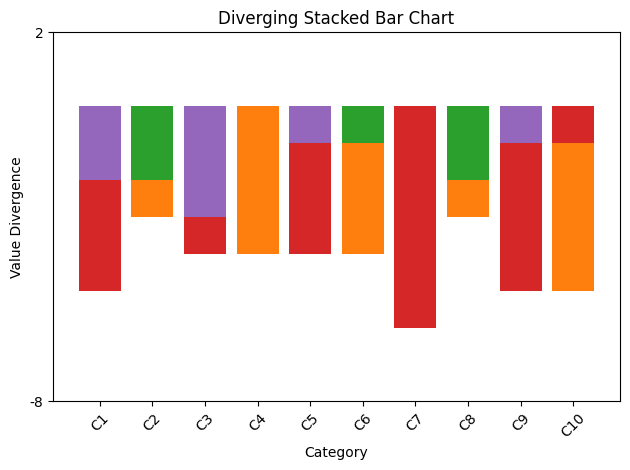

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Given 2D array
data = np.array([[0, 3, 0, 4, 0, 3, 0, 3, 0, 2],
                 [0, 3, 0, 4, 1, 4, 0, 3, 2, 5],
                 [1, 2, 1, 0, 2, 1, 2, 2, 0, 0],
                 [5, 0, 4, 0, 4, 0, 6, 0, 5, 1],
                 [2, 0, 3, 0, 1, 0, 0, 0, 1, 0]])

# Calculating the center position for each stack
center_pos = np.mean(np.sum(data, axis=0))

# Plotting
fig, ax = plt.subplots()

# The initial bottom is centered around the center_pos
bottom = np.array([center_pos] * len(data[0]))

for row in data:
    # For each row in the data, we calculate the offsets from the center
    # This will make the bars diverge from the center line
    left_positions = center_pos - row
    ax.bar(range(len(row)), row, bottom=left_positions)
    bottom += row

# Setting the y-ticks to show centered labels with respect to the center_pos
yticks = np.arange(0, int(max(bottom)), 10)
ytick_labels = [str(int(y-center_pos)) for y in yticks]
ax.set_yticks(yticks)
ax.set_yticklabels(ytick_labels)

ax.set_title('Diverging Stacked Bar Chart')
ax.set_xlabel('Category')
ax.set_ylabel('Value Divergence')

plt.xticks(range(len(data[0])), ['C' + str(i) for i in range(1, 11)], rotation=45)
plt.tight_layout()

plt.show()


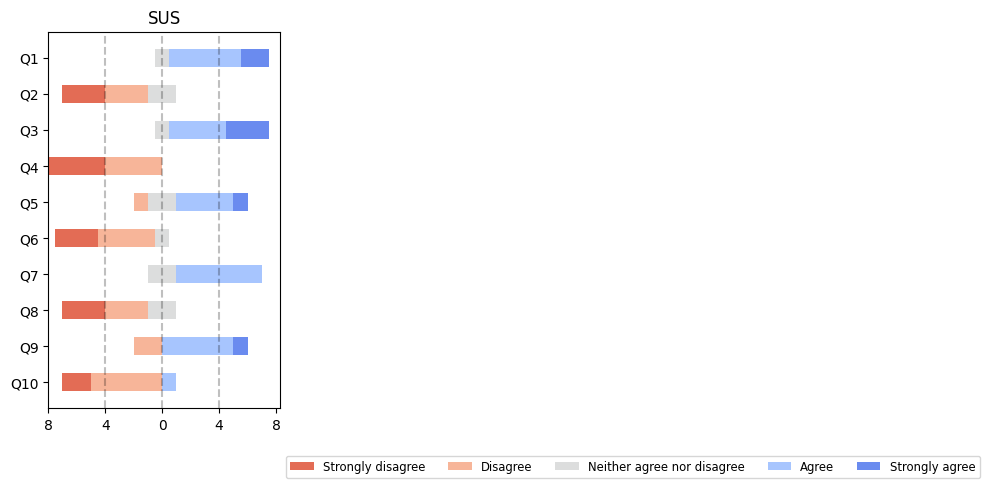

In [116]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
# results = {
#     'Q1': [10, 15, 17, 32, 26],
#     'Q2': [26, 22, 29, 10, 13],
#     'Q3': [35, 37, 7, 2, 19],
#     'Q4': [32, 11, 9, 15, 33],
#     'Q5': [21, 29, 5, 5, 40],
#     'Q6': [8, 19, 5, 30, 38],
#     'Q7': [21, 29, 5, 5, 40],
#     'Q8': [21, 29, 5, 5, 40],
#     'Q9': [21, 29, 5, 5, 40],
#     'Q10': [21, 29, 5, 5, 40],
# }
results = dict()
for i in range(10):
    results["Q" + str(i + 1)] = stacked_data[i]


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*. The order is assumed
        to be from 'Strongly disagree' to 'Strongly aisagree'
    category_names : list of str
        The category labels.
    """
    
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    middle_index = data.shape[1]//2
    offsets = data[:, range(middle_index)].sum(axis=1) + data[:, middle_index]/2
    
    # Color Mapping
    category_colors = plt.get_cmap('coolwarm_r')(
        np.linspace(0.15, 0.85, data.shape[1]))
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Plot Bars
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths - offsets
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)
    
    # Add Zero Reference Line
    ax.axvline(0, linestyle='--', color='black', alpha=.25)
    ax.axvline(4, linestyle='--', color='black', alpha=.25)
    ax.axvline(-4, linestyle='--', color='black', alpha=.25)
    
    # X Axis
    # ax.set_xlim(-90, 90)
    ax.set_xticks(np.arange(-8, 9, 4))
    ax.xaxis.set_major_formatter(lambda x, pos: str(abs(int(x))))
    
    # Y Axis
    ax.invert_yaxis()
    
    # Remove spines
    # ax.spines['right'].set_visible(False)
    # ax.spines['top'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    
    # Ledgend
    ax.legend(ncol=len(category_names), bbox_to_anchor=(1, -0.2),
              loc='lower left', fontsize='small')
    
    # Set Background Color
    fig.set_facecolor('#FFFFFF')

    return fig, ax


fig, ax = survey(results, category_names)
ax.set_title('SUS')
plt.tight_layout()
plt.savefig("SUS Score.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
easiness = 6.125
easiness_err = 0.1068116574
compatibility = 5.875	
compatibility_err = 0.1876652711
satisfaction = 5.75
satisfaction_err = 0.2136233148



C:\Users\kevin\AppData\Local\Temp\ipykernel_27092\1438552721.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(0, 8))


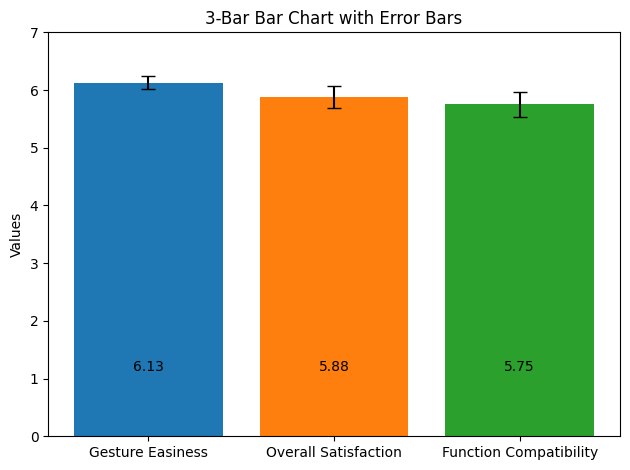

In [130]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = ['Gesture Easiness', 'Overall Satisfaction', 'Function Compatibility']
values = [6.13 , 5.88 , 5.75 ]
errors = [0.11, 0.19, 0.21]  # Error values

# Create the bar chart
fig, ax = plt.subplots()
bars = ax.bar(categories, values, color=['#1f77b4', '#ff7f0e', '#2ca02c'], yerr=errors, capsize=5)

# Adding the numeric text on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() /2 , 1),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_title('3-Bar Bar Chart with Error Bars')
ax.set_ylabel('Values')
ax.set_ylim(0, 7)  # Adjust the y-axis limit to fit the text
ax.set_yticklabels(range(0, 8))

plt.tight_layout()
plt.show()

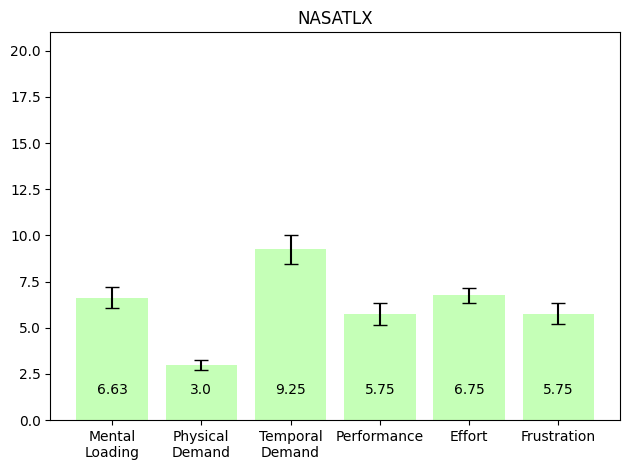

In [143]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
mental_loading = 6.625	
ml_err = 0.5837583486
physical_demand	 = 3
pd_err = 0.2788866755
temporal_demand = 9.25
td_err = 0.7753647375
performance	= 5.75
p_err = 0.5959519529
effort = 6.75
effort_err = 0.4249182928
frustration = 5.75
f_err = 0.568693853
categories = ['Mental\nLoading', 'Physical\nDemand', 'Temporal\nDemand', "Performance", "Effort", "Frustration"]
values = [6.63 , 3 , 9.25, 5.75, 6.75, 5.75 ]
errors = [0.58, 0.28, 0.78, 0.6, 0.42, 0.57]  # Error values

# Create the bar chart
fig, ax = plt.subplots()
bars = ax.bar(categories, values, color=['#c5ffb7'], yerr=errors, capsize=5)

# Adding the numeric text on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() /2 , 1),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_title('NASATLX')
# ax.set_ylabel('Values')
ax.set_ylim(0, 21)  # Adjust the y-axis limit to fit the text
plt.tight_layout()
plt.savefig("NASATLX.pdf", format="pdf", bbox_inches="tight")
plt.show()